## Contexte

Présentation des données qui serviront à créer un model IA capable de détecter les email SPAM.  
Nous allons voir qu'il est possible de faire aussi un modèle en Machine Learning plutôt efficace qui notre équipe a préféré partir sur un projet en Deep Learning, qui est présenté en détail dans "notebook_model".  

## Information dataset

<ul>
<li>Category : Specifies whether mail is spam or not.  

1 --> Spam  
0 --> Not spam</li>  
<li>Message : Raw text messages  
Combinations of Plain messages with headers and also few with HTML tags.</li>  
<li>File_Name: Unique message indicators</li>  
</ul>

## Import libraries

In [1]:
import pandas as pd
import numpy as np

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.filterwarnings(action="ignore")

## Forme dataset

In [2]:
df = pd.read_csv('data/Spam Email raw text for NLP.csv')
df

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


In [3]:
#shape of dataset
df.shape

(5796, 3)

In [4]:
#checking for null values
df.isna().sum()

CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

Nous avons **3 colonnes pour 5796 lignes avec 0 valeurs nulls.**  

In [5]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


En nous intéressant à la colonne **CATEGORY**, notre target, nous constatons un déséquilibre de la target, avec davantage de 0 (non-spam) que de 1 (spam).  

In [6]:
df.CATEGORY.unique()

array([1, 0], dtype=int64)

In [8]:
df["CATEGORY"].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

Nous pouvons mieux nous en rendre compte avec quelque plot en guise de visuel.  

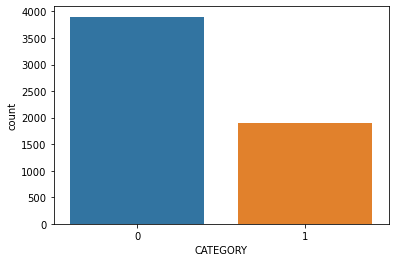

In [7]:
#form target

sns.countplot(df["CATEGORY"])
plt.show()

## Cleaning text

In [9]:
def standardize_text(df, content_field):
    df[content_field] = df[content_field].str.replace(r"http\S+", "")
    df[content_field] = df[content_field].str.replace(r"http", "")
    df[content_field] = df[content_field].str.replace(r"@\S+", "")
    df[content_field] = df[content_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[content_field] = df[content_field].str.replace(r"@", "at")
    df[content_field] = df[content_field].str.replace(r"\n", " ")
    df[content_field] = df[content_field].str.lower()
    return df

In [10]:
standardize_text(df,"MESSAGE")

,CATEGORY,MESSAGE,FILE_NAME
0,1,"dear homeowner, interest rates are at thei...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,attention this is a must for all computer use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,this is a multi part message in mime format ...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,important information the new domain names...,00210.050ffd105bd4e006771ee63cabc59978
4,1,this is the bottom line if you can give away...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"i'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,damien morton quoted w3c approves html 4 'e...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"on mon, 2002 07 22 at 06 50, che wrote t...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"once upon a time, manfred wrote i would...",01178.5c977dff972cd6eef64d4173b90307f0


In [11]:
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Simplon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Simplon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Simplon\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
df

,CATEGORY,MESSAGE,FILE_NAME
0,1,"dear homeowner, interest rates are at thei...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,attention this is a must for all computer use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,this is a multi part message in mime format ...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,important information the new domain names...,00210.050ffd105bd4e006771ee63cabc59978
4,1,this is the bottom line if you can give away...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"i'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,damien morton quoted w3c approves html 4 'e...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"on mon, 2002 07 22 at 06 50, che wrote t...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"once upon a time, manfred wrote i would...",01178.5c977dff972cd6eef64d4173b90307f0


In [14]:
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(0, len(df)):
    message = re.sub('[^a-zA-Z]', ' ', df['MESSAGE'][i])
    message = message.split()
    message =[word for word in message if not word in set(stopwords.words('english'))]
    message = [lemmatizer.lemmatize(word) for word in message]
    message = ' '.join(message)
    corpus.append(message)

In [15]:
corpus

['dear homeowner interest rate lowest point year help find best rate situation matching need hundred lender home improvement refinance second mortgage home equity loan even le perfect credit service free home owner new home buyer without obligation fill quick simple form jump start future plan today visit unsubscribe please visit',
 'attention must computer user new special package deal norton systemworks software suite professional edition includes six yes feature packed utility special low price software protect computer unwanted hazardous virus help secure private valuable information allow transfer file send e mail safely backup data quick easily improve pc performance w superior integral diagnostics feature packed utility great price combined retail value includes free shipping fall prey destructive virus hacker protect computer valuable information delay get copy today email screened filtered house opt system compliance state law wish opt mailing well list thousand email provider

## Applying tfidf (test modeling)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3))
X = tfidf.fit_transform(corpus)
y = df["CATEGORY"]

In [17]:
X

<5796x1331380 sparse matrix of type '<class 'numpy.float64'>'
	with 2806809 stored elements in Compressed Sparse Row format>

In [22]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5791    0
5792    0
5793    0
5794    0
5795    0
Name: CATEGORY, Length: 5796, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
print(X_train[0])

  (0, 1012869)	0.02876942565564746
  (0, 1132235)	0.02876942565564746
  (0, 1012721)	0.02876942565564746
  (0, 1132224)	0.02876942565564746
  (0, 813668)	0.02876942565564746
  (0, 1108220)	0.026546781826758157
  (0, 1061270)	0.026546781826758157
  (0, 1061247)	0.026546781826758157
  (0, 1108395)	0.026546781826758157
  (0, 515174)	0.026546781826758157
  (0, 646692)	0.026546781826758157
  (0, 1108278)	0.026546781826758157
  (0, 1108365)	0.07964034548027447
  (0, 1061279)	0.07749375099993201
  (0, 1108287)	0.026546781826758157
  (0, 1061274)	0.026546781826758157
  (0, 98838)	0.026546781826758157
  (0, 1108147)	0.026546781826758157
  (0, 342603)	0.026546781826758157
  (0, 1108149)	0.026546781826758157
  (0, 1010939)	0.026546781826758157
  (0, 111812)	0.02876942565564746
  (0, 331918)	0.02876942565564746
  (0, 375716)	0.02876942565564746
  (0, 163137)	0.02876942565564746
  :	:
  (0, 222115)	0.011877526276863655
  (0, 856971)	0.012003952529241486
  (0, 1120979)	0.023231559561108884
  (0, 116

## Training LightGBM Classifier

In [20]:
# build the lightgbm model
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

## Accuracy and Confusion Matrix of Model

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       798
           1       0.99      0.97      0.98       362

    accuracy                           0.99      1160
   macro avg       0.99      0.98      0.99      1160
weighted avg       0.99      0.99      0.99      1160

----------------------------------------------------------------------------------
Accuracy of LightGBM Model: 98.79310344827587 %


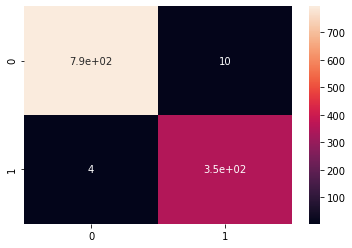

In [21]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_pred, y_test)
print("----------------------------------------------------------------------------------")
sns.heatmap(cm, annot=True)
print("Accuracy of LightGBM Model:", acc*100,"%")